## Python Practice Project - Airbnb Data

As you've worked through the Python sub-unit, you would have realised there are a number of powerful functions to use.

You would have covered the following libraries:

<li> Matplotlib </li>
<li> Seaborn </li>
<li> Pandas </li> 
    
These are all powerful libraries to help augment data analysis capabilities.
We've crafted a few extra challenges to reinforce your understanding of how these libraries work. Note there is an emphasis on the Pandas Library.

We've provided a file called airbnb_2.csv that you'll need to import.

Let's do this first before we start our analysis.

<b> Don't forget to import the libraries you need to read .csv files! </b> 



### Step 1: <span style="color:green">Import Libraries</span> 
<b> Put your code in the box below </b>


In [199]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2: <span style="color:green">Import the Airbnb Dataset</span> 

**Now that you have the Pandas Libraries imported, it's time to import the airbnb dataset.**

i) Import the airbnb dataset.

ii) Upon completion of this, use .info() to better understand the variables inside your dataset.

In [11]:
bnb_df = pd.read_csv('airbnb_2.csv')

In [204]:
print(bnb_df.info(), '\n\n')
print(bnb_df.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### Step 3: <span style="color:green">Exploring your data with Pandas</span> 

The rest of these questions will have you focus on using the following Pandas Skills:

<li> Subsetting a Pandas dataframe using [] and boolean operators </li>
<li> Summing up Records with value_counts()</li>
<li> Creating calculated fields </li>
<li> Group By in Pandas </li> 
<li> Creating Bar Plots with Matplotlib</li> 



<b> i)  Please count how many airbnb listings are in each of the 5 Neighbourhood Groups (Manhattan, Brooklyn, Queens, Bronx, Staten Island) and identify which Neighbourhood Groups has the largest number of Airbnb Listings </b>

Manhattan Listings: 21661 

Brooklyn Listings: 20104 

Queens Listings: 5666 

Bronx Listings: 1091 

Staten Island Listings: 373 



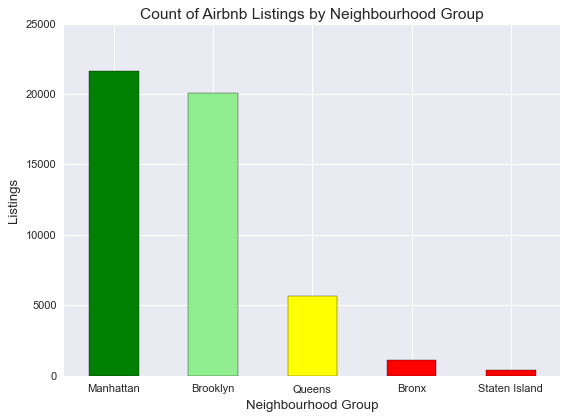

In [248]:
# Filter the Abnb DataFrame for the neighbourhood groups
n_groups = bnb_df[bnb_df['neighbourhood_group'].isin(['Manhattan','Brooklyn','Queens','Bronx','Staten Island'])]

# Count Airbnb listings by neighbourhood group and store in series called 'listings'
listings = n_groups['neighbourhood_group'].value_counts(ascending=False)

# Iterate over each neighbourhood group in 'listings' series and print the neighbourhood group / count of listings
for hood, lis in listings.items():
    print(hood, 'Listings:',lis,'\n')
    
# Plot, format, and show bar chart of 'listings' series
listings.plot(kind='bar', color=['green','lightgreen','yellow','red','red'])

plt.style.use('bmh')
plt.title('Count of Airbnb Listings by Neighbourhood Group', fontsize=14)
plt.xlabel('Neighbourhood Group', fontsize=12)
plt.ylabel('Listings', fontsize=12)
plt.xticks(rotation=360)

plt.show()

We want to focus our attention on the Neighbourhood Groups that have the top 3 number of Airbnb Listings.

<b> ii) Calculate the % listings that each Neighbourhood Group contains. </b>

Manhattan: 44.3% 

Brooklyn: 41.12% 

Queens: 11.59% 

Bronx: 2.23% 

Staten Island: 0.76% 



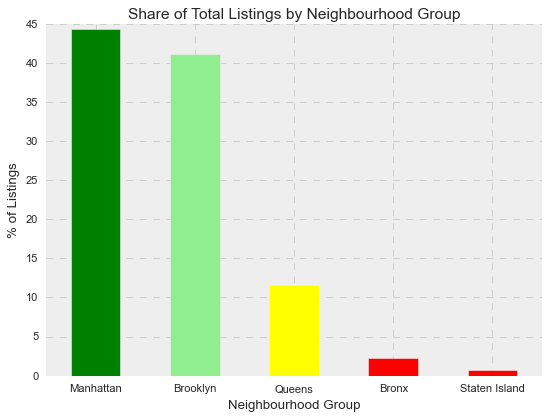

In [273]:
n_groups = bnb_df[bnb_df['neighbourhood_group'].isin(['Manhattan','Brooklyn','Queens','Bronx','Staten Island'])]

listings = n_groups['neighbourhood_group'].value_counts(ascending=False)

total_listings = bnb_df['neighbourhood_group'].count()

# Calculate % of listings, assigned to share_listings
share_listings = (listings / total_listings * 100).round(2)

for hood, share in share_listings.items():
    print(hood + ':',str(share) + '%','\n')
    
perc_list.plot(kind='bar', color=['green','lightgreen','yellow','red','red'])

plt.style.use('bmh')
plt.title('Share of Total Listings by Neighbourhood Group', fontsize=14)
plt.xlabel('Neighbourhood Group', fontsize=12)
plt.ylabel('% of Listings', fontsize=12)
plt.xticks(rotation=360)

plt.show()

# check if this is correct... is this % of total listings or % among just those neighbourhood groups?

<b> iii) Create a new calculated field called Revenue and place this into the Airbnb Dataframe. This is to be calculated by using the Price Column x Number_Of_Reviews Columns </b>

In [211]:
bnb_df['Revenue'] = bnb_df['price'] * bnb_df['number_of_reviews']
print('Columns: ', '\n', bnb_df.columns, '\n\n')
print(bnb_df.head(3))

Columns:  
 Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'Revenue'],
      dtype='object') 


     id                                 name  host_id  host_name  \
0  2539   Clean & quiet apt home by the park     2787       John   
1  2595                Skylit Midtown Castle     2845   Jennifer   
2  3647  THE VILLAGE OF HARLEM....NEW YORK !     4632  Elisabeth   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0 

<b> iv) Create a Bar Plot that shows which Neighbourhood Group has the highest average revenues. In order to best
calculate this, you'd want to consider how you can use the .groupby() syntax to assist you! </b>

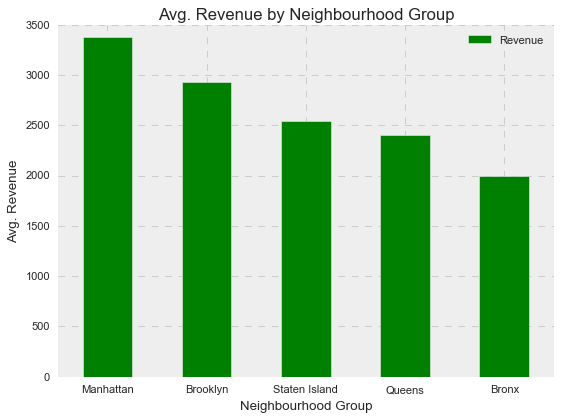

In [262]:
# Group by neighbourhood group, calculate average revenue, sort by avg revenue descending
avg_rev = bnb_df.groupby('neighbourhood_group')['Revenue'].mean().sort_values(ascending=False)
avg_rev_hood_df = pd.DataFrame(avg_rev)

# Plot and format bar chart
avg_rev_hood_df.plot(kind='bar', color='green')

plt.style.use('bmh')
plt.title('Avg. Revenue by Neighbourhood Group', fontsize=15)
plt.xlabel('Neighbourhood Group', fontsize=12)
plt.ylabel('Avg. Revenue',fontsize=12)
plt.xticks(rotation=360)

# Show plot
plt.show()

<h3> <span style="color:green">Challenge Questions</span> </h3>

<b> V) Filter the Airbnb Dataframe to include only the Neighbourhood Groups Manhattan, Brookly and Queens. 
    
Upon completion of this, identify the top 3 Revenue Generating Neighborhoods within each of the three Neighbourhood_Groups. This should give us 9 Overall Rows: 3 of the top generating neighbourhoods within each of the 3 Neighbourhood_Groups </b>

This question is meant to test your group-by skills further.

In [222]:
# First, filter bnb_df for neighborhood groups
condition1 = bnb_df['neighbourhood_group'] == 'Manhattan'
condition2 = bnb_df['neighbourhood_group'] == 'Brooklyn'
condition3 = bnb_df['neighbourhood_group'] == 'Queens'

filtered_df = bnb_df[condition1 | condition2 | condition3]

# Group and identify top 3 revenue generating neighborhoods in each neighborhood group, then sum revenues
grouped_df = filtered_df.groupby(['neighbourhood_group', 'neighbourhood'])['Revenue'].sum().reset_index()

# Use for loop to filter grouped_df by neighbourhood group, select top 3 neighbourhoods by revenue, and print results
for g in ['Manhattan', 'Brooklyn', 'Queens']:
    group_df = grouped_df[grouped_df['neighbourhood_group'] == g]
    top_3_hoods = group_df.nlargest(3, 'Revenue').sort_values('Revenue', ascending=False)
    print(f'Top 3 Revenue Generating Neighborhoods in {g}:')
    for index, row in top_3_hoods.iterrows():
        print(row['neighbourhood'].capitalize() + ':', '$' + str(row['Revenue']))

Top 3 Revenue Generating Neighborhoods in Manhattan:
Harlem: $8598692
Hell's kitchen: $8238991
East village: $7574535
Top 3 Revenue Generating Neighborhoods in Brooklyn:
Williamsburg: $12389011
Bedford-stuyvesant: $12352457
Bushwick: $4762224
Top 3 Revenue Generating Neighborhoods in Queens:
Astoria: $1880840
Long island city: $1374945
Flushing: $1140450


<b> VI) Building on the previous question where you identified the top 3 Neighbourhoods within each of the three neighbourhood_groups based off Revenues, please filter the Airbnb Dataframe to include only these neighbourhoods. 
    
Upon completion of this, identify the  top average revenue generating room type for each of the nine neighbourhoods and plot this out in a Bar Chart.</b>

This is a tricky question that will again test your group-by skills. Think back to the previous question and how you approached this; you can approach this in a similar manner.   

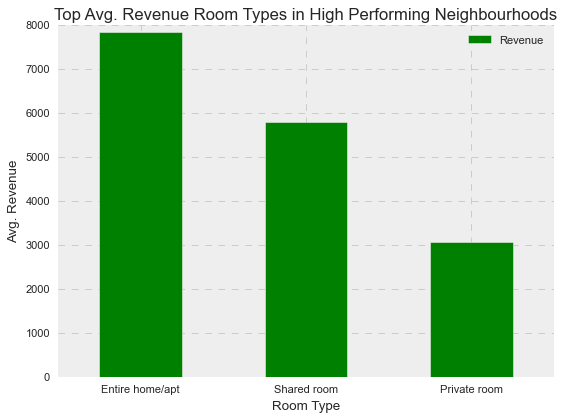

In [251]:
# for loop to get list of top 3 revenue generating neighborhoods by neighborhood group
top_hoods = []
for g in ['Manhattan', 'Brooklyn', 'Queens']:
    group_df = bnb_df[bnb_df['neighbourhood_group'] == g]
    top_hoods += group_df.nlargest(3, 'Revenue')['neighbourhood'].tolist()

# Filter DataFrame to include only top 3 revenue generating neighborhoods by neighborhood group
filtered_df = bnb_df.loc[(bnb_df['neighbourhood_group'].isin(['Manhattan', 'Brooklyn', 'Queens'])) & (bnb_df['neighbourhood'].isin(top_hoods)), ['neighbourhood_group', 'neighbourhood', 'room_type', 'Revenue']]

# Group by neighborhood and room type (not neighbourhood group), calculate avg revenue, make average_revenue numeric
grouped_df = filtered_df.groupby(['neighbourhood', 'room_type'])['Revenue'].mean().reset_index()
grouped_df['Revenue'] = pd.to_numeric(grouped_df['Revenue'])

# Get index of highest avg revenue for each neighborhood and sort descending
top_room_types = grouped_df.groupby('room_type')['Revenue'].idxmax()
top_room_types_df = grouped_df.loc[top_room_types].sort_values('Revenue', ascending=False)

# Plot and format bar chart
top_room_types_df.plot(kind='bar', x='room_type', y='Revenue', color='green')

plt.style.use('bmh')
plt.title('Top Avg. Revenue Room Types in High Performing Neighbourhoods', fontsize=15)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Avg. Revenue',fontsize=12)
plt.xticks(rotation=360)

# Show plot
plt.show()